In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from math import sin, cos, sqrt, atan2, radians
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(5)

In [2]:
df = pd.read_pickle('boosted_dataset.pkl')

In [15]:
def haversine_to_downtown(point):
    # calculates the distance between two points (lat, lngs) on a great circle, or on the 
    # surface of a sphere (in this case the sphere is planet earth)
    # units in km
    lat, lng = point
    deglen = 110.25
    x = lat - 30.2648
    y = (lng - (-97.7472))*cos(-97.7472)
    return deglen*sqrt(x*x + y*y)

In [12]:
# get list of coordinates
subset = df[['lat', 'lon']]
tuples = [tuple(x) for x in subset.values]

In [16]:
distances = [haversine_to_downtown(coord) for coord in tuples]

In [18]:
df['dist_to_downtown'] = distances

In [26]:
X = df[['dist_to_downtown', 'price_per_sqft', 'bedrooms']].values

/Users/austinmadert/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


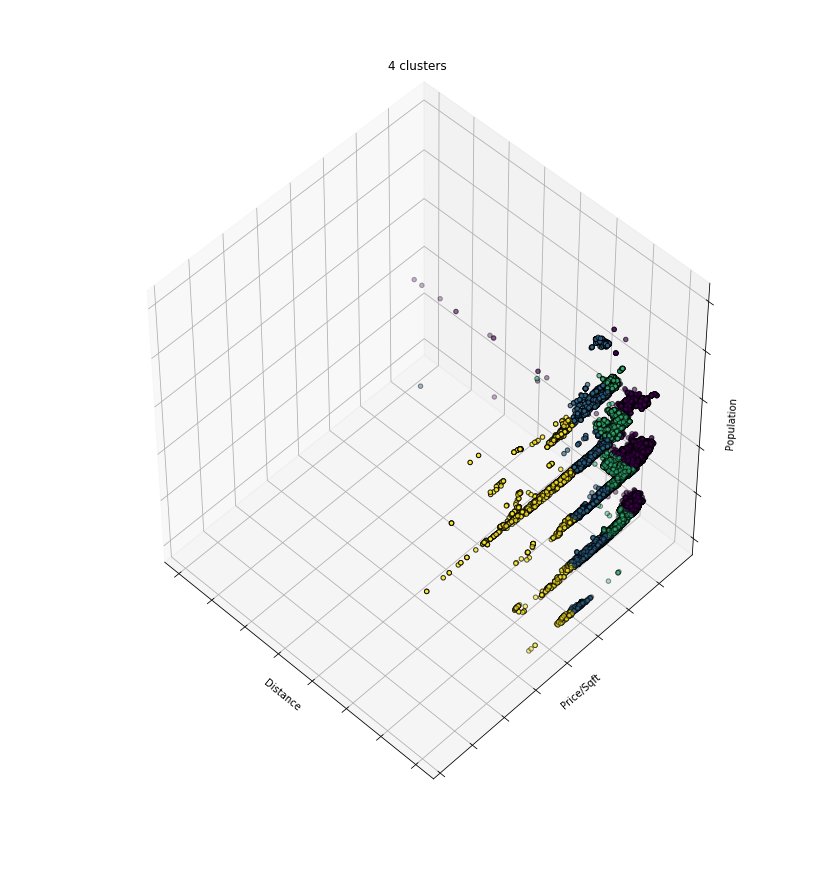

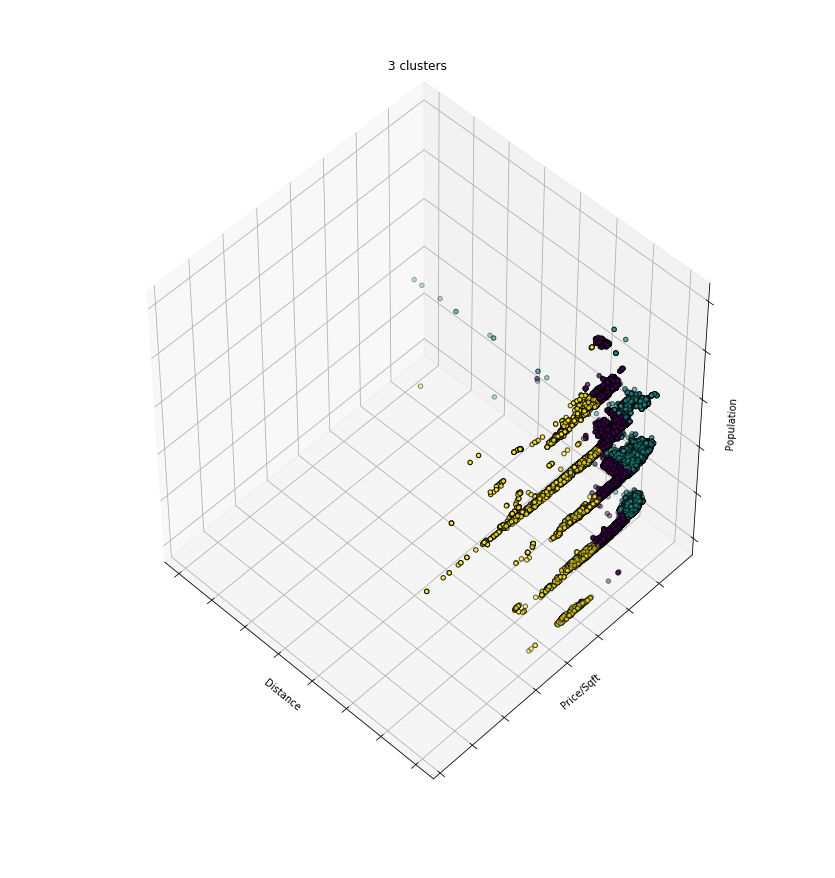

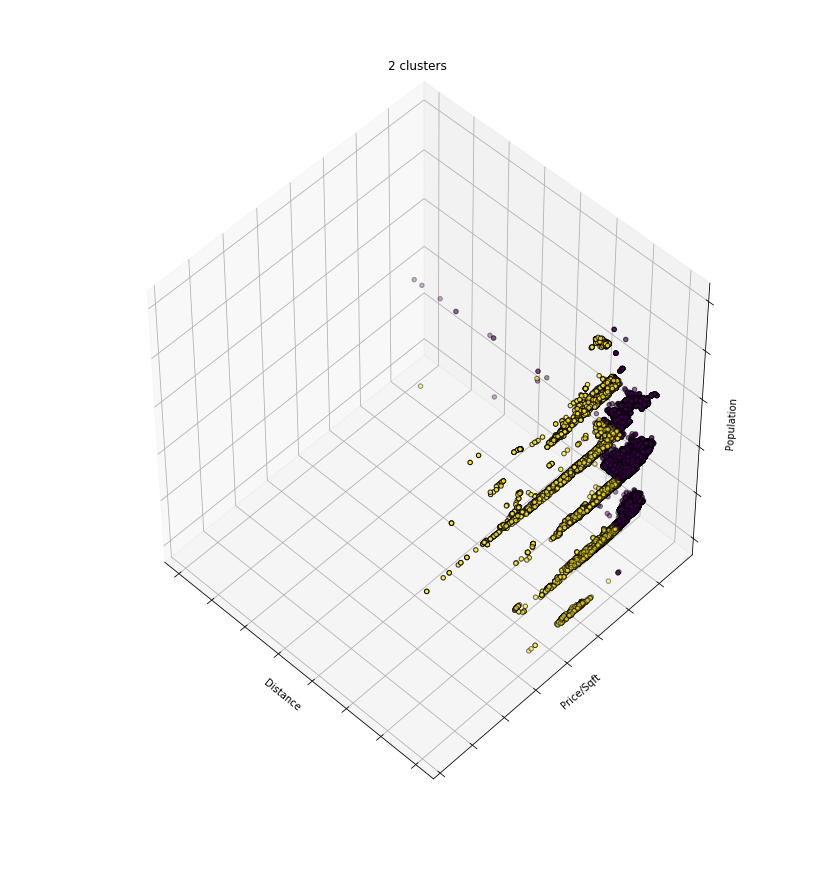

In [28]:
estimators = [('k_means_4', KMeans(n_clusters=4)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_2', KMeans(n_clusters=2))]

fignum = 1
titles = ['4 clusters', '3 clusters', '2 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(12, 12))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 0], X[:, 1], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Distance')
    ax.set_ylabel('Price/Sqft')
    ax.set_zlabel('Population')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum += 1

fig.show()